# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using algorithms ***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NIO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


### Data Wrangling
Take info

<AxesSubplot:xlabel='Rating', ylabel='count'>

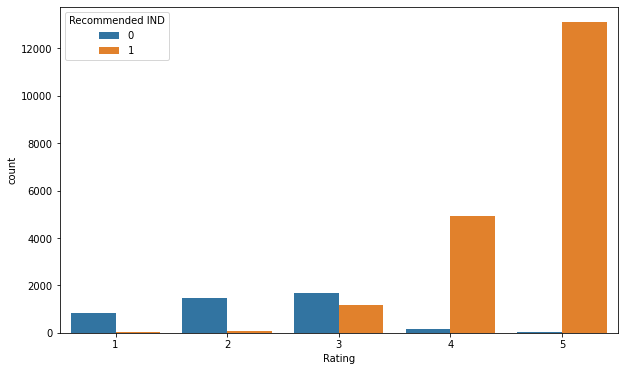

In [4]:
plt.figure(figsize = (10,6))
sns.countplot(x="Rating", data=df, hue = "Recommended IND")

In [5]:
df["Recommended IND"].unique()

array([1, 0], dtype=int64)

In [6]:
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]

<AxesSubplot:xlabel='Rating', ylabel='count'>

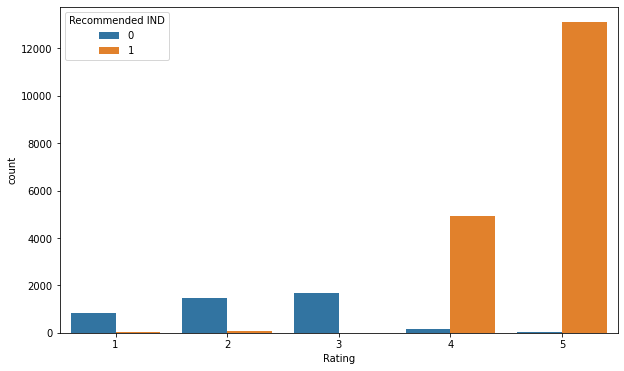

In [7]:
plt.figure(figsize = (10,6))
sns.countplot(x="Rating", data=df, hue = "Recommended IND")

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

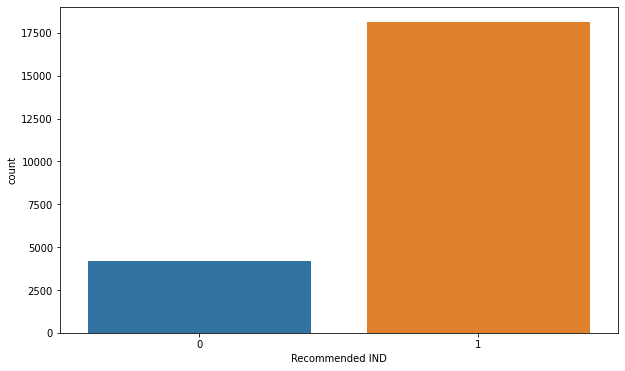

In [8]:
plt.fig = plt.figure(figsize = (10,6))
sns.countplot(x="Recommended IND", data=df);

---
---


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [9]:
df.rename(columns={"Review Text":"sentences", "Recommended IND":"label"}, inplace=True)

In [10]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,sentences,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [11]:
df=df[['sentences','label']]
df.head()

,sentences,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Missing Value Detection

In [12]:
df.isnull().sum()

sentences    826
label          0
dtype: int64

In [13]:
df.dropna(inplace = True)
df

,sentences,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23478,I was surprised at the positive reviews for th...,0
23479,So i wasn't sure about ordering this skirt bec...,1
23481,I was very happy to snag this dress at such a ...,1
23483,"This fit well, but the top was very see throug...",0


In [14]:
rare_words = pd.Series(" ".join(df["sentences"]).split()).value_counts()[pd.Series(" ".join(df["sentences"]).split()).value_counts() <=2]
rare_words

glamorous,    2
misaligned    2
shell,        2
moon          2
exclusive.    2
             ..
"horse        1
hahahaha      1
gasped        1
basis         1
platinum      1
Length: 25738, dtype: int64

In [15]:
rare_words.index

Index(['glamorous,', 'misaligned', 'shell,', 'moon', 'exclusive.', 'ok!',
       'grid', 'long)', '67', 'Sweater',
       ...
       'live).', 'fit...disappointed', 'understand.', 'encouraging',
       'sweater"', '"horse', 'hahahaha', 'gasped', 'basis', 'platinum'],
      dtype='object', length=25738)

In [16]:
df["sentence"] = df["sentences"].apply(lambda x: " ".join(i for i in x.split() if i not in rare_words.index))

In [17]:
df["sentence"][:10]

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress! it's sooo pretty. i happened ...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
5    I love tracy reese dresses, but this one is no...
6    I this in my basket at hte last to see what it...
7    I ordered this in carbon for store pick up, an...
8    I love this dress. i usually get an xs but it ...
9    I'm and 125 lbs. i ordered the s petite to mak...
Name: sentence, dtype: object

In [18]:
df["sentence"].shape

(21471,)

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [19]:
stop_words = stopwords.words('english')

In [20]:
def cleaning(data):
    
    text_tokens=nltk.word_tokenize(data.lower())
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    return " ".join(text_cleaned)

In [21]:
df["sentences"] = df["sentences"].apply(cleaning)

In [22]:
df["sentences"][:5]

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store gla...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: sentences, dtype: object

In [23]:
df["sentences"].shape

(21471,)

---
---


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [24]:
positive_sentences = df[df["label"] == 1]["sentences"]
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store gla...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
23476    bottom cute defiantly cheeky would recommend s...
23477    impressed beautiful color combination embroide...
23479    sure ordering skirt could see person first gla...
23481    happy snag dress great price easy slip flatter...
23485    dress lovely platinum feminine fit perfectly e...
Name: sentences, Length: 17370, dtype: object

In [25]:
negative_sentences = df[df["label"] == 0]["sentences"]
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one petite foot tall us...
10       dress run small esp zipper area run ordered sp...
22       first pullover styling side zipper would purch...
25       loved material didnt really look long dress pu...
                               ...                        
23449    tried color really pretty fun want pair pant l...
23450    wanted love jacket soft great color unfortunat...
23460    purchased good price typically love maeve fabr...
23478    surprised positive review product terrible cut...
23483    fit well top see never would worked glad able ...
Name: sentences, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [26]:
positive_words = " ".join(positive_sentences)
positive_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store glad bc never'

In [27]:
negative_words = " ".join(negative_sentences)
negative_words[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [28]:
import os

In [29]:
from wordcloud import WordCloud

In [30]:
wordcloud_positive = WordCloud(background_color = "white", max_words = len(positive_words))

In [31]:
wordcloud_positive.generate(positive_words)

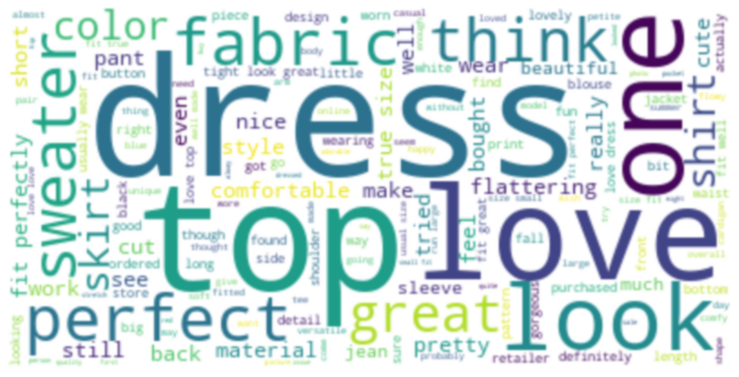

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation = "bicubic")
plt.axis("off")
plt.show()

In [33]:
wordcloud_negative = WordCloud(background_color = "white", max_words = len(negative_words))

In [34]:
wordcloud_negative.generate(negative_words)

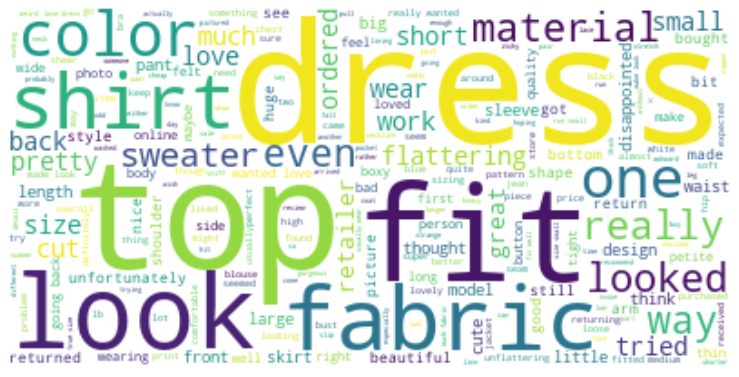

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_negative, interpolation = "bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [36]:
X = df["sentences"]
y = df["label"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 42)

<IPython.core.display.Javascript object>

In the next step we create a numerical feature vector for each document:

### Vectorization

In [38]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [39]:
vectorizer.get_feature_names()[:10]

['aa',
 'aaaaaaamazing',
 'aaaaannnnnnd',
 'aaaahmazing',
 'aaaahs',
 'aaahed',
 'ab',
 'abbey',
 'abby',
 'abck']

In [40]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
a = pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())
a

,aa,aaaaaaamazing,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,ab,abbey,abby,abck,...,zipped,zipper,zippered,zippie,zipping,zombie,zone,zoolander,zoom,zooming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [42]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [43]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
b = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())
b

,aa,aaaaaaamazing,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,ab,abbey,abby,abck,...,zipped,zipper,zippered,zippie,zipping,zombie,zone,zoolander,zoom,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Logistic Regression

In [45]:
X_train_count.shape

(17176, 10623)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [47]:
logmodel_count = LogisticRegression(C = 10)
logmodel_count.fit(X_train_count, y_train)

LogisticRegression(C=10)

In [48]:
y_pred = logmodel_count.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 541  279]
 [ 217 3258]]
              precision    recall  f1-score   support

           0       0.71      0.66      0.69       820
           1       0.92      0.94      0.93      3475

    accuracy                           0.88      4295
   macro avg       0.82      0.80      0.81      4295
weighted avg       0.88      0.88      0.88      4295



In [49]:
sklearn.__version__

<IPython.core.display.Javascript object>

'0.24.2'

In [50]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(logmodel_count, X_train_count, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for count : {scores}\n")

 accuracy score for count : 0.8874593447840298

 precision-0 score for count : 0.7203088442378248

 recall-0 score for count : 0.6726564237526873

 f1-0 score for count : 0.6953988369707721

 precision-1 score for count : 0.9239086619847677

 recall-1 score for count : 0.9381782867442545

 f1-1 score for count : 0.9309722541128055



In [51]:
logmodel_tf_idf = LogisticRegression(C = 10)
logmodel_tf_idf.fit(X_train_tf_idf, y_train)

LogisticRegression(C=10)

In [52]:
y_pred = logmodel_tf_idf.predict(X_test_tf_idf)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 531  289]
 [ 144 3331]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       820
           1       0.92      0.96      0.94      3475

    accuracy                           0.90      4295
   macro avg       0.85      0.80      0.82      4295
weighted avg       0.89      0.90      0.90      4295



In [53]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(logmodel_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for tf_idf : {scores}\n")

 accuracy score for tf_idf : 0.9007927639987171

 precision-0 score for tf_idf : 0.7831196250941294

 recall-0 score for tf_idf : 0.6650307658091779

 f1-0 score for tf_idf : 0.7189622905767704

 precision-1 score for tf_idf : 0.9236599757022794

 recall-1 score for tf_idf : 0.9564592818186055

 f1-1 score for tf_idf : 0.9397589999461461



### Naive Bayes 



In [54]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
naive_count = BernoulliNB()
naive_count.fit(X_train_count, y_train)

BernoulliNB()

In [55]:
y_pred = naive_count.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 528  292]
 [ 174 3301]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       820
           1       0.92      0.95      0.93      3475

    accuracy                           0.89      4295
   macro avg       0.84      0.80      0.81      4295
weighted avg       0.89      0.89      0.89      4295



In [56]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(naive_count, X_train_count, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for count : {scores}\n")

 accuracy score for count : 0.8878663885014811

 precision-0 score for count : 0.7205045883687315

 recall-0 score for count : 0.6756931573875009

 f1-0 score for count : 0.6969984017043401

 precision-1 score for count : 0.9245680223338159

 recall-1 score for count : 0.9379626665837956

 f1-1 score for count : 0.9311934868289784



In [57]:
naive_tf_idf = BernoulliNB()
naive_tf_idf.fit(X_train_tf_idf, y_train)

BernoulliNB()

In [58]:
y_pred = naive_tf_idf.predict(X_test_tf_idf)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 528  292]
 [ 174 3301]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       820
           1       0.92      0.95      0.93      3475

    accuracy                           0.89      4295
   macro avg       0.84      0.80      0.81      4295
weighted avg       0.89      0.89      0.89      4295



In [59]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(naive_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for tf_idf : {scores}\n")

 accuracy score for tf_idf : 0.8878663885014811

 precision-0 score for tf_idf : 0.7205045883687315

 recall-0 score for tf_idf : 0.6756931573875009

 f1-0 score for tf_idf : 0.6969984017043401

 precision-1 score for tf_idf : 0.9245680223338159

 recall-1 score for tf_idf : 0.9379626665837956

 f1-1 score for tf_idf : 0.9311934868289784



### Support Vector Machine (SVM)

In [60]:
from sklearn.svm import LinearSVC

In [61]:
svm_count = LinearSVC(C=10).fit(X_train_count, y_train)
y_pred = svm_count.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 534  286]
 [ 298 3177]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.65       820
           1       0.92      0.91      0.92      3475

    accuracy                           0.86      4295
   macro avg       0.78      0.78      0.78      4295
weighted avg       0.86      0.86      0.86      4295



In [62]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(svm_count, X_train_count, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for count : {scores}\n")

 accuracy score for count : 0.8590473068398398

 precision-0 score for count : 0.6276924707421834

 recall-0 score for count : 0.6507116910074876

 f1-0 score for count : 0.640070538075408

 precision-1 score for count : 0.9172906865732244

 recall-1 score for count : 0.908023110669132

 f1-1 score for count : 0.9124810753983061



In [63]:
svm_tf_idf = LinearSVC(C=10).fit(X_train_tf_idf, y_train)
y_pred = svm_tf_idf.predict(X_test_tf_idf)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 550  270]
 [ 236 3239]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       820
           1       0.92      0.93      0.93      3475

    accuracy                           0.88      4295
   macro avg       0.81      0.80      0.81      4295
weighted avg       0.88      0.88      0.88      4295



In [64]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(svm_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for tf_idf : {scores}\n")

 accuracy score for tf_idf : 0.8790176031915319

 precision-0 score for tf_idf : 0.6901065530793924

 recall-0 score for tf_idf : 0.6662549114092965

 f1-0 score for tf_idf : 0.6776860322179747

 precision-1 score for tf_idf : 0.921862656564676

 recall-1 score for tf_idf : 0.9292543675642639

 f1-1 score for tf_idf : 0.9255248509297734



### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf_count = RandomForestClassifier(300, n_jobs = -1, min_samples_split =3, random_state = 42).fit(X_train_count, y_train)
y_pred = rf_count.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 233  587]
 [  27 3448]]
              precision    recall  f1-score   support

           0       0.90      0.28      0.43       820
           1       0.85      0.99      0.92      3475

    accuracy                           0.86      4295
   macro avg       0.88      0.64      0.67      4295
weighted avg       0.86      0.86      0.83      4295



In [66]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(rf_count, X_train_count, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for count : {scores}\n")

 accuracy score for count : 0.8603868864596519

 precision-0 score for count : 0.9124741280639952

 recall-0 score for count : 0.298382014975165

 f1-0 score for count : 0.44913082122075876

 precision-1 score for count : 0.8570434087367038

 recall-1 score for count : 0.9930909354589763

 f1-1 score for count : 0.920058189468876



In [67]:
rf_tf_idf = RandomForestClassifier(300, n_jobs = -1, min_samples_split =3, random_state = 42).fit(X_train_tf_idf, y_train)
y_pred = rf_tf_idf.predict(X_test_tf_idf)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 228  592]
 [  24 3451]]
              precision    recall  f1-score   support

           0       0.90      0.28      0.43       820
           1       0.85      0.99      0.92      3475

    accuracy                           0.86      4295
   macro avg       0.88      0.64      0.67      4295
weighted avg       0.86      0.86      0.82      4295



In [68]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(rf_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for tf_idf : {scores}\n")

 accuracy score for tf_idf : 0.8570683292392788

 precision-0 score for tf_idf : 0.913766108179121

 recall-0 score for tf_idf : 0.2782609904366521

 f1-0 score for tf_idf : 0.42625068474768557

 precision-1 score for tf_idf : 0.8536213461782282

 recall-1 score for tf_idf : 0.993738624651035

 f1-1 score for tf_idf : 0.9183623033381867



### Ada  Boosting

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
ada_count = AdaBoostClassifier(n_estimators= 100, random_state = 42).fit(X_train_count, y_train)
y_pred = ada_count.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 458  362]
 [ 145 3330]]
              precision    recall  f1-score   support

           0       0.76      0.56      0.64       820
           1       0.90      0.96      0.93      3475

    accuracy                           0.88      4295
   macro avg       0.83      0.76      0.79      4295
weighted avg       0.87      0.88      0.87      4295



In [71]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(ada_count, X_train_count, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for count : {scores}\n")

 accuracy score for count : 0.8805894692735725

 precision-0 score for count : 0.7426800379812128

 recall-0 score for count : 0.573886129438802

 f1-0 score for count : 0.6470179803641604

 precision-1 score for count : 0.9045565042144943

 recall-1 score for count : 0.9530049049313465

 f1-1 score for count : 0.9281303660560841



In [72]:
ada_tf_idf = AdaBoostClassifier(n_estimators= 100, random_state = 42).fit(X_train_tf_idf, y_train)
y_pred = ada_tf_idf.predict(X_test_tf_idf)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 460  360]
 [ 149 3326]]
              precision    recall  f1-score   support

           0       0.76      0.56      0.64       820
           1       0.90      0.96      0.93      3475

    accuracy                           0.88      4295
   macro avg       0.83      0.76      0.79      4295
weighted avg       0.87      0.88      0.87      4295



In [73]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(ada_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for tf_idf : {scores}\n")

 accuracy score for tf_idf : 0.8793086731805413

 precision-0 score for tf_idf : 0.7396296158986374

 recall-0 score for tf_idf : 0.5690192008303062

 f1-0 score for tf_idf : 0.6428861920454627

 precision-1 score for tf_idf : 0.9035038938867004

 recall-1 score for tf_idf : 0.9525730948718347

 f1-1 score for tf_idf : 0.9273767111527645



### Compare Models Accuracies and F1 Scores

In [74]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

a = make_scorer(f1_score, average='weighted', labels = [0])
b = make_scorer(f1_score, average='weighted', labels = [1])

compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "Naive Bayes Count", "Naive Bayes Tf", "SVM Count", "SVM Tf", 
#                                      "RF Count", "RF Tf", "Ada Count", "Ada Tf"
                                 ],
                        "f1-0": [cross_val_score(logmodel_count, X_train_count, y_train, cv = 10, scoring = a).mean(), 
                                     cross_val_score(logmodel_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = a).mean(), 
                                     cross_val_score(naive_count, X_train_count, y_train, cv = 10, scoring = a).mean(),
                                     cross_val_score(naive_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = a).mean(), 
                                     cross_val_score(svm_count, X_train_count, y_train, cv = 10, scoring = a).mean(),
                                     cross_val_score(svm_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = a).mean(),
#                                      cross_val_score(rf_count, X_train_count, y_train, cv = 10, scoring = a).mean(),
#                                      cross_val_score(rf_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = a).mean(),
#                                      cross_val_score(ada_count, X_train_count, y_train, cv = 10, scoring = a).mean(),
#                                      cross_val_score(ada_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = a).mean()
                                ]})

compare = compare.sort_values(by="f1-0", ascending=True)

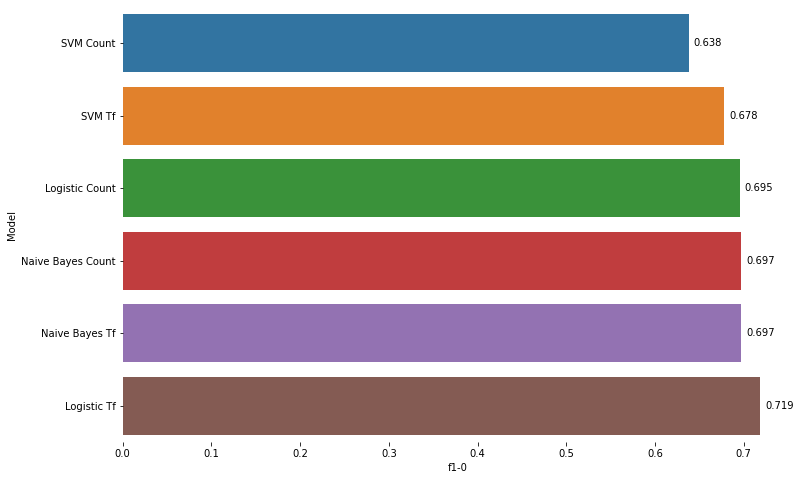

In [75]:
fig = plt.subplots(figsize=(12,8))
ax = sns.barplot( compare["f1-0"], compare["Model"])
sns.despine(bottom = True, left = True)
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

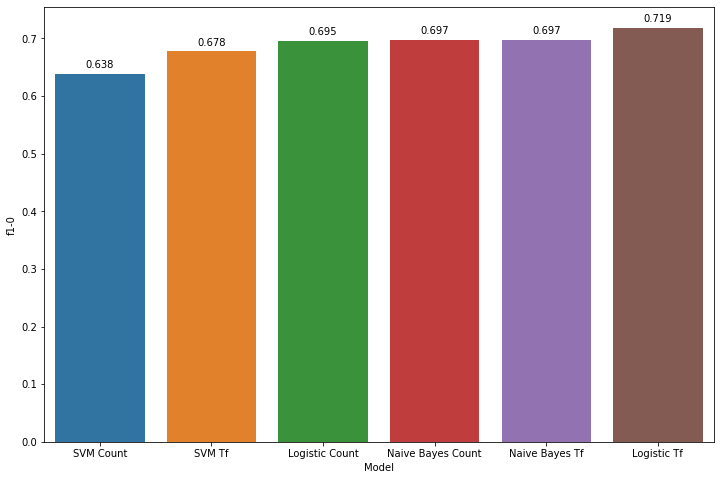

In [76]:
fig = plt.subplots(figsize=(12,8))
ax = sns.barplot(compare["Model"], compare["f1-0"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [77]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

b = make_scorer(f1_score, average='weighted', labels = [1])

compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "Naive Bayes Count", "Naive Bayes Tf", "SVM Count", "SVM Tf", 
#                                   "RF Count", "RF Tf", "Ada Count", "Ada Tf"
                                 ],
                        "f1-1": [cross_val_score(logmodel_count, X_train_count, y_train, cv = 10, scoring = b).mean(), 
                                     cross_val_score(logmodel_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = b).mean(), 
                                     cross_val_score(naive_count, X_train_count, y_train, cv = 10, scoring = b).mean(),
                                     cross_val_score(naive_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = b).mean(), 
                                     cross_val_score(svm_count, X_train_count, y_train, cv = 10, scoring = b).mean(),
                                     cross_val_score(svm_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = b).mean(),
#                                      cross_val_score(rf_count, X_train_count, y_train, cv = 10, scoring = b).mean(),
#                                      cross_val_score(rf_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = b).mean(),
#                                      cross_val_score(ada_count, X_train_count, y_train, cv = 10, scoring = b).mean(),
#                                      cross_val_score(ada_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = b).mean()
                                ]})

compare = compare.sort_values(by="f1-1", ascending=True)

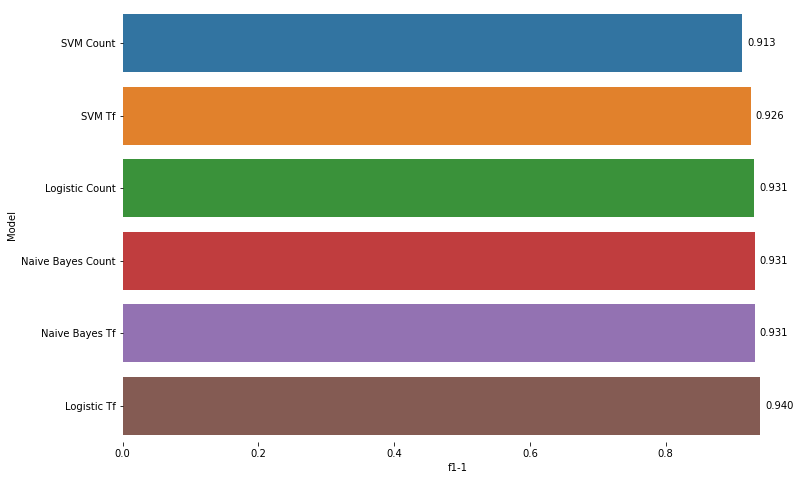

In [78]:
fig = plt.subplots(figsize=(12,8))
ax = sns.barplot( compare["f1-1"], compare["Model"])
sns.despine(bottom = True, left = True)
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

In [79]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

c = make_scorer(accuracy_score)

compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "Naive Bayes Count", "Naive Bayes Tf", "SVM Count", "SVM Tf", 
#                                   "RF Count", "RF Tf", "Ada Count", "Ada Tf"
                                 ],
                        "accuracy": [cross_val_score(logmodel_count, X_train_count, y_train, cv = 10, scoring = c).mean(), 
                                     cross_val_score(logmodel_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = c).mean(), 
                                     cross_val_score(naive_count, X_train_count, y_train, cv = 10, scoring = c).mean(),
                                     cross_val_score(naive_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = c).mean(), 
                                     cross_val_score(svm_count, X_train_count, y_train, cv = 10, scoring = c).mean(),
                                     cross_val_score(svm_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = c).mean(),
#                                      cross_val_score(rf_count, X_train_count, y_train, cv = 10, scoring = c).mean(),
#                                      cross_val_score(rf_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = c).mean(),
#                                      cross_val_score(ada_count, X_train_count, y_train, cv = 10, scoring = c).mean(),
#                                      cross_val_score(ada_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = c).mean()
                                    ]})

compare = compare.sort_values(by="accuracy", ascending=True)

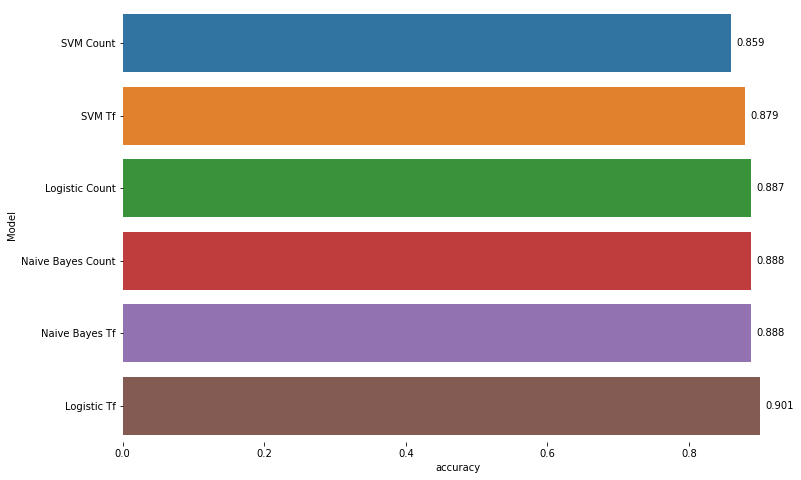

In [80]:
fig = plt.subplots(figsize=(12,8))
ax = sns.barplot( compare["accuracy"], compare["Model"])
sns.despine(bottom = True, left = True)
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.88 for Logistic Regression method. 